# Статистический анализ данных / Python
## Задание 2

**Правила:**

* Дедлайн **24 ноября 23:59**.
* Выполненную работу нужно отправить на почту ` mipt.stats@yandex.ru`, указав тему письма `"[MADE19] Фамилия Имя - задание 2"`. Квадратные скобки обязательны. Если письмо дошло, придет ответ от автоответчика.
* Прислать нужно ноутбук и его pdf-версию (без архивов), которую можно сделать с помощью печати в файл через инструменты браузера.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него. 
* Разделяйте код вычислений и отрисовки графиков. Так будет удобнее вам и проверяющим.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt

%matplotlib inline

---------------

### Задача 1. (5 баллов)
В этой задаче нужно визуализировать доверительные интервалы для выборок из различных распределений в модели нормального распределения. 
Чтобы не плодить код, напишите следующую функцию.

In [18]:
def draw_confidence_interval(ppf,sample=None):
    size = np.arange(1, 101)
    means = sample.cumsum() / np.arange(1, 101)
    #s= sample.var(sample)
    plt.figure(figsize=(15, 8))
    plt.scatter(size, sample, alpha=0.2, s=40, label='sample') # s - размер точек
    # linewidth - толщина линии
    plt.plot(size, means, color='red', linewidth=2.5, label='sample mean $\overline{X}$')
    # заполняет пространство между двумя функциями
    plt.fill_between(size, means + ppf / np.sqrt(size), means - ppf / np.sqrt(size), alpha=0.15)
    plt.legend()
    # размеры графика по горизонтальной оси (ставим None, если по стороне ограничен
    plt.xlim((1, 100))
    plt.ylim((sample.min(), sample.max())) # размеры графика по вертикальной оси
    plt.xlabel('Size') # название горизонтальной оси (аналогично plt.ylabel)
    plt.title('Sample by size') # имя графика
    plt.grid() # добавляем сетку
    plt.savefig('example.png') # сохранение в файл
    plt.show()


Рассмотрим следующие ситуации:

1. Выборка из распределения $\mathcal{N}(0, 1)$; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

2. Выборка из распределения $\mathcal{N}(0, 1)$; асимптотический доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

3. Выборка из распределения Коши; точный доверительный интервал минимальной длины в параметрической модели $\mathcal{N}(\theta, 1)$.

Для каждой ситуации из перечисленных выше сгенерируйте выборку $X_1, ... X_{100}$ и постройте график доверительных интервалов уровня доверия $0.95$, вычисленных для всех подвыборок вида $X_1, ... X_i$, $1 \le i \le 100$.

Постройте графики зависимости верхних и нижних границ интервала от размера выборки, используя написанную функцию. Нужно нанести на график точки выборки.
Для вычисления квантилей у каждого распределения из `scipy.stats` используйте функцию `ppf`.


In [9]:
sample_one = sps.norm.rvs(size=100) #1 случай

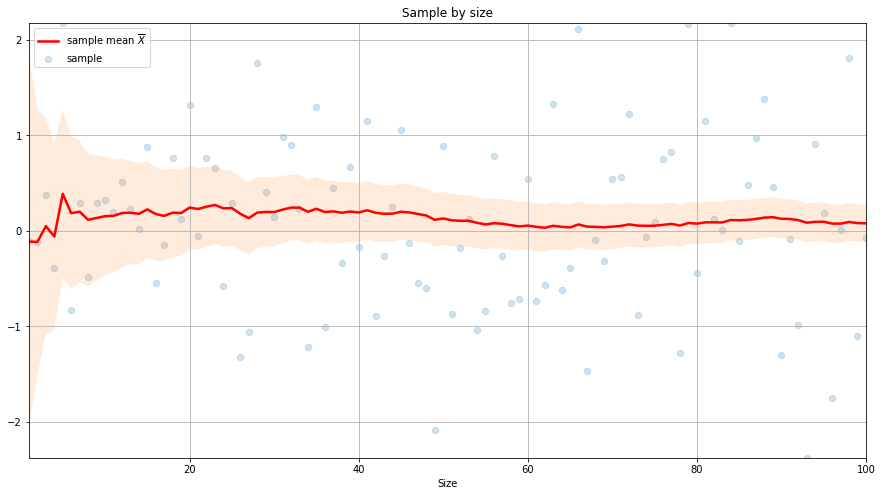

In [19]:
draw_confidence_interval(ppf=sps.norm.ppf(0.975),sample=sample_one)

In [13]:
sample_two = sps.norm.rvs(size=100) # такая же ситуация для второго случая. Неточность в задании? 
#Возможно,имелось в виду, что дисперсия не известна? тогда нам нужно считать s

In [14]:
def running_var_simple(sample):
    result = np.zeros(len(sample))
    for i in range(len(result)):
        result[i] = np.var(sample[0:i+1])
    return result


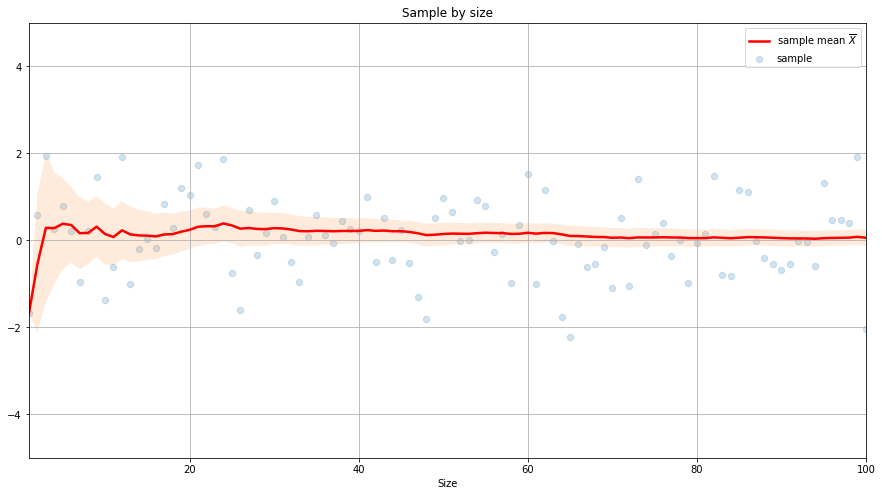

In [22]:
size = np.arange(1, 101)
means = sample_two.cumsum() / np.arange(1, 101)
s=  np.sqrt(running_var_simple(sample_two))
plt.figure(figsize=(15, 8))
plt.scatter(size, sample_two, alpha=0.2, s=40, label='sample') # s - размер точек
# linewidth - толщина линии
plt.plot(size, means, color='red', linewidth=2.5, label='sample mean $\overline{X}$')
# заполняет пространство между двумя функциями
plt.fill_between(size, means + sps.t.ppf(0.975,df=99)*s / np.sqrt(size), means - sps.t.ppf(0.975,df=99)*s / np.sqrt(size), alpha=0.15)
plt.legend()
# размеры графика по горизонтальной оси (ставим None, если по стороне ограничен
plt.xlim((1, 100))
plt.ylim((-5, 5)) # размеры графика по вертикальной оси
plt.xlabel('Size') # название горизонтальной оси (аналогично plt.ylabel)
plt.title('Sample by size') # имя графика
plt.grid() # добавляем сетку
plt.savefig('example.png') # сохранение в файл
plt.show()

In [16]:
sample_three=sps.cauchy.rvs(loc=0, scale=1,size=100) # Третий случай

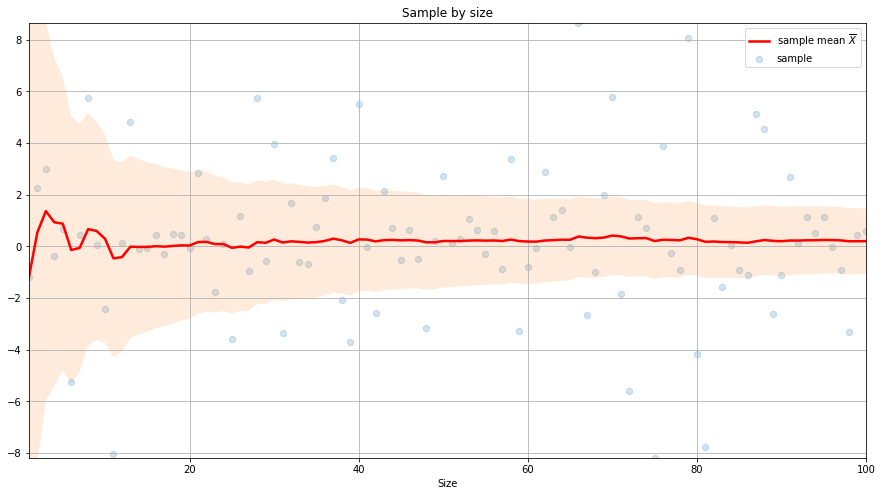

In [20]:
draw_confidence_interval(ppf=sps.cauchy.ppf(0.975),sample=sample_three)

**Вывод:** С ростом размера выборки доверительные интервалы сужаются, оценка параметра приближается к его реальному значению.
Для распределения Коши интервалы оказались шире, что ожидаемо, так как "хвосты" распределения тяжее, следовательно, элементы выборки отклоняются от среднего чаще, чем в случае с нормальным распределением. 

---------------

### Задача 2. (5 баллов)

Cкачайте данные <a href="http://archive.ics.uci.edu/ml/datasets/wine"> wine dataset </a> и выберите произвольные 3 произвольных
столбца с действительными числами, а также столбцы `Total phenols` и `Alcohol`. 

С помощью `seaborn.PairGrid` постройте таблицу графиков,
состоящую из
* одномерных ядерных оценок плотности по диагонали;
* двумерных ядерных оценок плотности ниже диагонали;
* scatter-plot выше диагонали (`plt.scatter`)


При возникновении затруднений посмотрите обучающий ноутбук по seaborn .

In [24]:
data=pd.read_csv('wine.data',header=None)

In [25]:
data.columns=['Class','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']

In [30]:
data.dtypes

Class                             int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                           int64
dtype: object

In [31]:
cols=['Total phenols','Alcohol','Ash','Malic acid','Nonflavanoid phenols']

In [32]:
datatovis=data[cols]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: The handle <matplotlib.patches.Patch object at 0x000001A5CB583348> has a label of '_nolegend_' which cannot be automatically added to the legend.
  **kwargs)


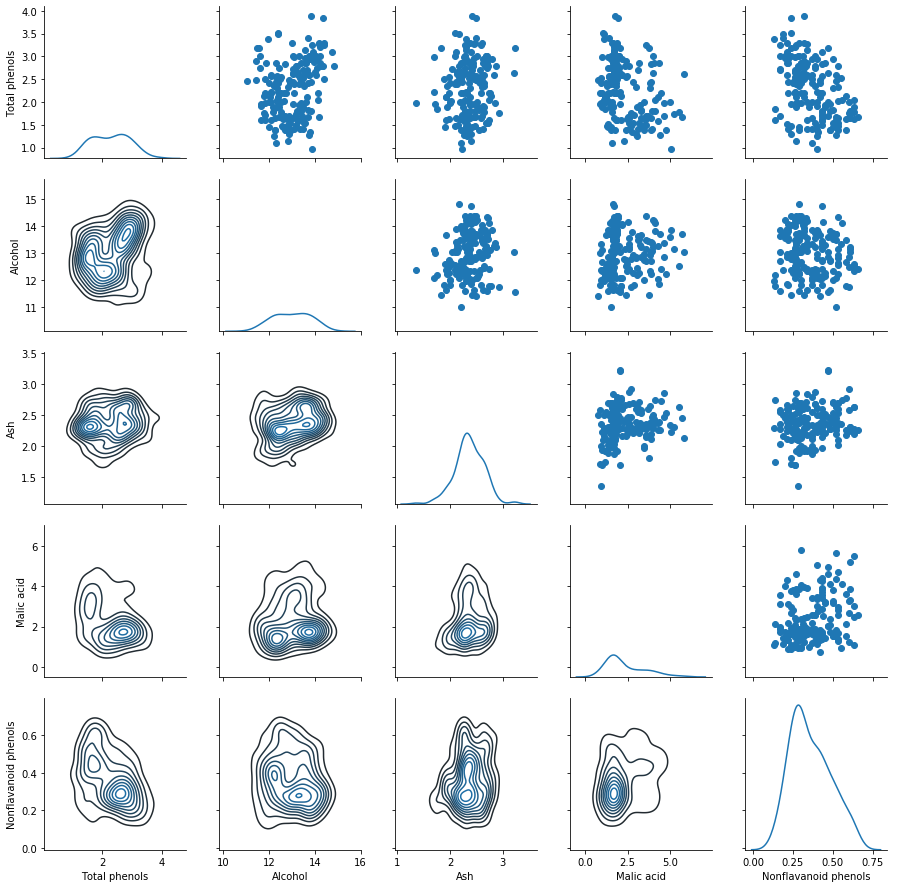

In [34]:
g = sns.PairGrid(datatovis)
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

Какие графики более наглядны: ядерные оценки плотности или scatter plots? 


Что можно сказать про распределения значений величин? С чем это может быть связано? (обратите внимание на пики)

**Ответ:** Графики во многом похожи, но визуализированные ядерные оценки плотности могут подсказать, где бы еще могли находиться другие "точки", помогают понять в какой области находится наибольшее скопление точек. По scatter плоту это тоже видно, но из-за нахожения точек друг на друга не всегда можно понять, насколько же их так много.

Распределение величин Ash и Nonflavanoid phenols визуально похоже на смещенное нормальное. Есть ярко выраженное среднее значение. Возможно, данная величина объясняется существованием каких-то стандартов, общепринятых для всех классов.
Для параметров Total phenols и Alcohol можно заметить несколько "средних" значений, что может быть связано с принадлежностью объектов к разным классам, для которых свойственно одно из этих "средних". На графиках для двумерных ядерных оценок для данных параметров заметны несколько ярковыраженных пиковых значений. 

Разброс величины Malic acid наиболее велик.

Пока что мы строили графики для значений признаков вин вне зависимости от их сорта (колонка `Class`). 
Это нужно для того, чтобы найти основные свойства распределения: какие значения оно принимает чаще всего, сколько пиковых значений у оценки плотности, насколько велик разброс значений и тд. 

Однако сейчас мы не знаем, как влияет сорт вина на значения признаков и стоит ли им пренебрегать.
Проведем небольшое иследование

Постройте графики одномерных оценок плотности для выбранных признаков, которые нарисуйте в два столбца.

В каждой строке:

* На первом графике нарисуйте три оценки плотности признака для вин каждого типа.

* На втором графике нарисуйте график ядерной оценки плотности для всех значений признака, которые есть в датасете (то есть независимо от типа вина)


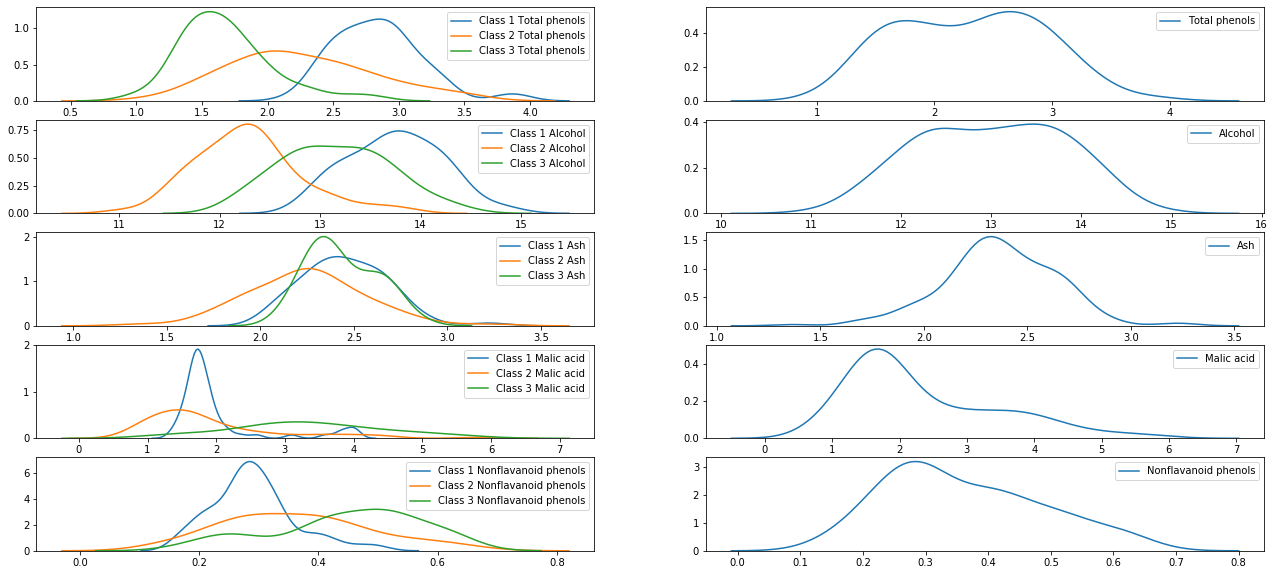

In [141]:
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(22, 10))
for i, j in zip(cols, range(0,5)):    
    sns.kdeplot(data[data['Class']==1][i],ax=axes[j,0],label='Class 1 '+i)
    sns.kdeplot(data[data['Class']==2][i],ax=axes[j,0],label='Class 2 '+i)
    sns.kdeplot(data[data['Class']==3][i],ax=axes[j,0],label='Class 3 '+i)    
    sns.kdeplot(data[i],ax=axes[j,1])

Сделайте выводы о влиянии класса вина на вид графиков и по всей задаче

**Ответ:** Как и ожидалось в первом пункте, для признаков Total phenols и Alcohol оценки плотности зависят от класса вина. Для признака Ash оценки очень похожи. Для признака Malic acid класс слабо влияет на разброс, однако, для класса 1 наблюдается ярко выраженный пик, что приводит к появлению пика для оценки плотности, не зависящей от класса. 
При решении задачи классификации будет целесообразно использовать признаки, распределение которых различается для разных классов. Признак Ash не будет информотивен, так как по значению данного признака будет сложно определить, к какому классу принадлежит объект по причине схожести оценок плотностей для различных классов.